<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 113ms/step - accuracy: 0.3025 - loss: 1.8764 - val_accuracy: 0.4696 - val_loss: 1.4542
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 112ms/step - accuracy: 0.5019 - loss: 1.3863 - val_accuracy: 0.5268 - val_loss: 1.2939
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.5573 - loss: 1.2381 - val_accuracy: 0.5786 - val_loss: 1.1866
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 109ms/step - accuracy: 0.5983 - loss: 1.1313 - val_accuracy: 0.6085 - val_loss: 1.1040
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.6239 - loss: 1.0653 - val_accuracy: 0.6181 - val_loss: 1.0878
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.6442 - loss: 1.0003 - val_accuracy: 0.6317 - val_loss: 1.0471
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.6551 - loss: 0.9686 - val_accuracy: 0.6447 - val_loss: 1.0021
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.6757 - loss

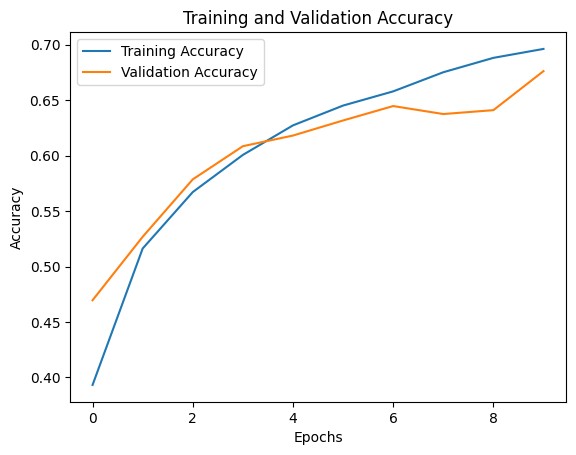

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential([
    Conv2D(64, (5,5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, (3,3), activation='relu'),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=10, batch_size=64)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
